In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Create the maze environment
maze = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],  # 0
    [1, 0, 1, 0, 0, 0, 1, 0, 0, 1],  # 1
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 1],  # 2
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],  # 3
    [1, 1, 1, 0, 1, 1, 1, 1, 0, 1],  # 4
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],  # 5
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 1],  # 6
    [1, 1, 1, 0, 1, 0, 1, 1, 0, 1],  # 7
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 1],  # 8
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]   # 9
])
MAZE_SIZE = maze.shape[0]

# Start, sub-goal, and end goal positions
start_position = (1, 1)       # S (Green)
sub_goal_position = (5, 3)    # G (Blue)
end_goal_position = (8, 8)    # E (Red)


In [37]:
# Parameters for Q-learning
gamma = 0.8  # Discount factor
alpha = 0.1  # Learning rate
epsilon = 0.2  # Exploration rate
episodes = 2000  # Number of episodes
max_steps = 200  # Max steps per episode

# Initialize Q-table (state-action values)
Q = np.zeros((MAZE_SIZE, MAZE_SIZE, 2, len(actions)))

# Reward matrix
reward_matrix = np.full(maze.shape, -1.0)  # Negative reward for each step
reward_matrix[sub_goal_position] = 10.0    # Reward for reaching sub-goal
reward_matrix[end_goal_position] = 500.0    # Reward for reaching end goal

# Function to choose the next action using epsilon-greedy policy
def epsilon_greedy(state):
    if np.random.rand() < epsilon:
        return np.random.randint(len(actions))  # Explore: random action
    else:
        return np.argmax(Q[state[0], state[1], int(state[2])])  # Exploit

# Function to run Q-learning
def q_learning():
    for episode in range(episodes):
        state = (start_position[0], start_position[1], False)  # Start state
        visited_states = set()  # Set to track visited states
        
        for step in range(max_steps):
            action_idx = epsilon_greedy(state)
            action = actions[action_idx]
            next_x = state[0] + action[0]
            next_y = state[1] + action[1]
            subgoal_reached = state[2]
            
            # Check if next_state is within bounds and not a wall
            if 0 <= next_x < MAZE_SIZE and 0 <= next_y < MAZE_SIZE and maze[next_x, next_y] == 0:
                # Prevent going back to previous states if subgoal is reached
                if subgoal_reached and (next_x, next_y) in visited_states:
                    reward = -100  # Penalize for trying to revisit states
                else:
                    visited_states.add((next_x, next_y))  # Mark this state as visited
                    reward = reward_matrix[next_x, next_y]
                
                    # If sub-goal is reached
                    if (next_x, next_y) == sub_goal_position:
                        subgoal_reached = True  # Update the flag
                        reward = 10.0  # Reward for reaching sub-goal
                
                    # If end goal is reached
                    if (next_x, next_y) == end_goal_position:
                        if subgoal_reached:
                            reward = 500.0  # Reward for reaching end goal after sub-goal
                        else:
                            reward = -100.0  # Penalty for trying to reach end goal before sub-goal

                # Q-learning update rule
                best_next_action = np.argmax(Q[next_x, next_y, int(subgoal_reached)])
                td_target = reward + gamma * Q[next_x, next_y, int(subgoal_reached), best_next_action]
                td_delta = td_target - Q[state[0], state[1], int(subgoal_reached), action_idx]
                Q[state[0], state[1], int(subgoal_reached), action_idx] += alpha * td_delta
                
                state = (next_x, next_y, subgoal_reached)  # Move to next state
                
                # End episode if end goal is reached after sub-goal
                if (next_x, next_y) == end_goal_position and subgoal_reached:
                    break
            else:
                # Penalize hitting a wall or moving out of bounds
                Q[state[0], state[1], int(subgoal_reached), action_idx] += alpha * (-100 + gamma * 0 - Q[state[0], state[1], int(subgoal_reached), action_idx])
                
        # Optional: Print progress every 100 episodes
        if (episode + 1) % 100 == 0:
            print(f'Episode {episode + 1}/{episodes} completed.')

# Run Q-learning
q_learning()

# Function to extract the optimal path from start to goal
def extract_q_path(start, goal):
    state = (start[0], start[1], False)
    path = [state[:2]]
    
    for step in range(max_steps):
        action_idx = np.argmax(Q[state[0], state[1], int(state[2])])
        action = actions[action_idx]
        next_x = state[0] + action[0]
        next_y = state[1] + action[1]
        subgoal_reached = state[2]
        
        if 0 <= next_x < MAZE_SIZE and 0 <= next_y < MAZE_SIZE and maze[next_x, next_y] == 0:
            if (next_x, next_y) == sub_goal_position:
                subgoal_reached = True
            state = (next_x, next_y, subgoal_reached)
            path.append((next_x, next_y))
        else:
            break  # Invalid move; stop the path
        
        if (next_x, next_y) == goal and subgoal_reached:
            break  # Goal reached

    return path

# Extract the path from start to end goal (sub-goal is included)
full_path = extract_q_path(start_position, end_goal_position)
print("Optimal Path:", full_path)



Episode 100/2000 completed.
Episode 200/2000 completed.
Episode 300/2000 completed.
Episode 400/2000 completed.
Episode 500/2000 completed.
Episode 600/2000 completed.
Episode 700/2000 completed.
Episode 800/2000 completed.
Episode 900/2000 completed.
Episode 1000/2000 completed.
Episode 1100/2000 completed.
Episode 1200/2000 completed.
Episode 1300/2000 completed.
Episode 1400/2000 completed.
Episode 1500/2000 completed.
Episode 1600/2000 completed.
Episode 1700/2000 completed.
Episode 1800/2000 completed.
Episode 1900/2000 completed.
Episode 2000/2000 completed.
Optimal Path: [(1, 1), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5), (5, 6), (6, 6), (6, 7), (6, 8), (7, 8), (8, 8)]


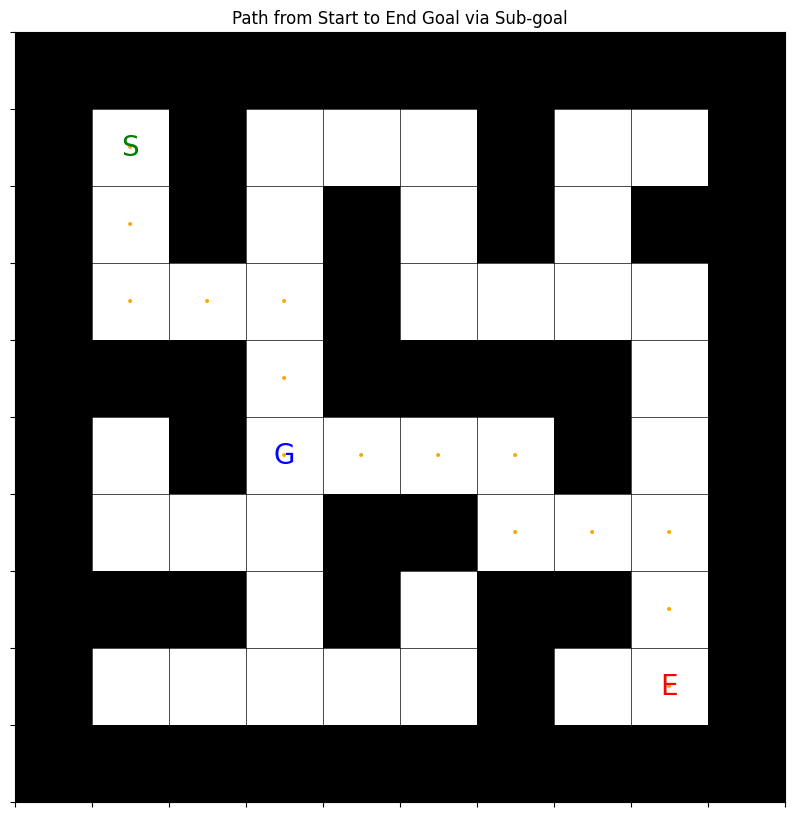

Steps to Sub-goal: 7
Steps to End Goal: 15


In [38]:

# Function to visualize the agent's path
def visualize_path(path, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(maze, cmap="gray_r")
    for (x, y) in path:
        plt.text(y, x, '•', color='orange', ha='center', va='center', fontsize=10)
    plt.text(start_position[1], start_position[0], 'S', color='green', ha='center', va='center', fontsize=20)
    plt.text(sub_goal_position[1], sub_goal_position[0], 'G', color='blue', ha='center', va='center', fontsize=20)
    plt.text(end_goal_position[1], end_goal_position[0], 'E', color='red', ha='center', va='center', fontsize=20)
    plt.title(title)
    plt.grid(True, which='both', color='black', linewidth=0.5)
    plt.xticks(np.arange(-.5, MAZE_SIZE, 1), [])
    plt.yticks(np.arange(-.5, MAZE_SIZE, 1), [])
    plt.show()

# Visualize the full path from start to end goal via sub-goal
visualize_path(full_path, "Path from Start to End Goal via Sub-goal")

# Print the number of steps to each goal
steps_to_sub_goal = full_path.index(sub_goal_position) + 1 if sub_goal_position in full_path else None
steps_to_end_goal = len(full_path)
print(f"Steps to Sub-goal: {steps_to_sub_goal}")
print(f"Steps to End Goal: {steps_to_end_goal}")


